# PROJECT 1: INVESTIGATE A DATASET [TMDb Movie Data]

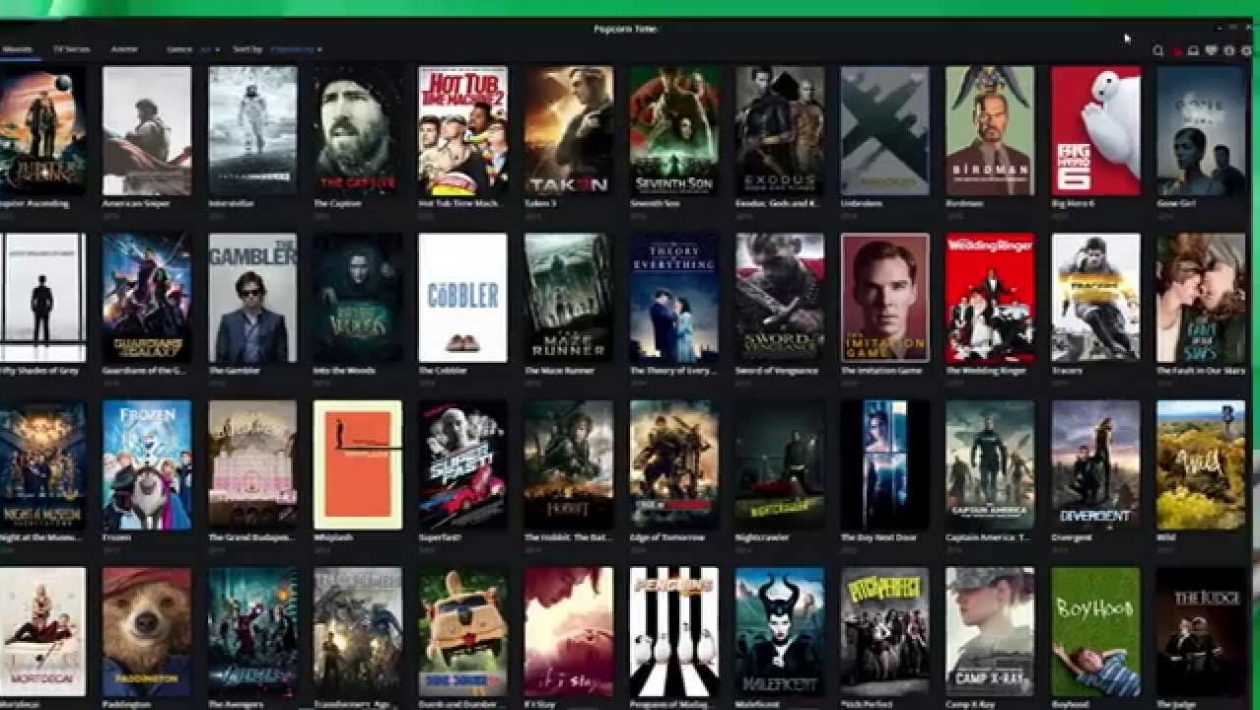

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Dataset descripion
In this project, I will  be investigating the TMDb movie data. 

#### What is TMDb movie data
Excerpt from [themoviedb.org](https://www.themoviedb.org/about): The Movie Database ( TMDb ) is a collaborative database about movies. It is a community built movie and TV database.

This data set i want to investigate contains information about 10,866 movies collected from The Movie Database (TMDb), including user ratings and revenue. I looked up the dataset to have an overview and see the attributes of the columns features that i can investigate on. This will help in getting questions i can use to investigate the dataset.

#### Features and description of the columns

<li>id - identity number
<li>imdb id - identifier for the IMDb
<li>popularity - number of evaluations
<li>budget - budget allocated for the movie (in US dollars)
<li>revenue - revenue generated from the movie (in US dollars)
<li>original title - titlee of the movie
<li>cast - actors of the movie
<li>homepage - website of the movie
<li>director - directorof the movie
<li>tagline - 
<li>keywords
<li>overview
<li>runtime - how long the movie elapsed
<li>genres - genre of the movie
<li>production compinies - name of production company
<li>release date - date of release
<li>vote count - number of votes obtained by the movie
<li>vote average - average movie rating (between 1.0 to 10.0)
<li>release year - year of release
<li>budget adj - budget adjusted for inflation (in US dollars)
<li>revenue adj - revenue adjusted for inflation (in US dollars

## Questions for analysis

#### After looking up at the dataset, i found the following questons will be useful for my analysis.
<li> 1. In which month is the highest number of movies released from year to year?
<li> 2. What's the top 10 movies with the highest budget?    
<li> 3. What's the average runtime of all the movies?
<li> 4. Which genre of movie have the highest return on investment?
<li> 5. Which genre has the highest number of released movies over the years?   

In [45]:
# Use pandas to load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [46]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In this section i looked at the general properties of the data that has been acquired including its format, its quantity (for example, the number of records and fields in each table), the identities of the fields and any other surface features which have been discovered. Evaluate whether the data acquired satisfies requirements.


### General Properties

In [47]:
#Load the dataset and print out a few lines. 
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [48]:
# Inspect data types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [49]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [50]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
From the properties above We can now see that there are 10865 entries 21 columns.
    Some attributes look like they will be useful for our research - we know the movie, release year, director cast, budget, revenue, rating which are all key to our research.
    Some of them contain a few missing values such as cast and director. While there are other attributes containing many more missing values such as homepage, tagline, keywords and production_companies.
    Columns imdb_id, homepage, tagline, overview look to be interesting but not have much value in the research required here, so may be worth dropping


 

#####  Remove duplicate rows

In [51]:
#counting the duplicates 
sum(df.duplicated())


1

In [52]:
#drop these duplicated rows 
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

##### Drop unnecessary columns that won't be used for the analysis

In [53]:
#Columns like imdb_id, homepage,tagline and overview are not required for my analysis, so i will drop them
columns = ['imdb_id', 'homepage', 'tagline', 'overview']
df.drop(columns, axis = 1, inplace=True)

In [54]:
# Check the remaining columns
df.shape

(10865, 17)

#### Fill nulls with zero

In [55]:
# check numbers of nulls
df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [56]:
# Fill the null values with zero using 'fillna' function
df1=df.fillna(0)

In [57]:
# Check if there's still null vaues
df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [58]:
# Remove outliers from the columns
def get_num_outliers (column):
 q1 = np.percentile(column, 25)
 q3 = np.percentile(column, 75)
 return sum((column<q1) | (column>q3))

In [59]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


<a id='eda'></a>
## Exploratory Data Analysis

Now that i have cleaned and trimmed the dataset i will now find patterns in the data by creating plots with the goal of addressingthe research questions that was posed in the introduction.


### Research question 1 (In which month is the highest number of movies released from year to year?)

In [61]:
# change the date from string format to datetime format 
df['release_date'] = pd.to_datetime(df['release_date'])

# count the movies in each month using value_counts().
number_of_release=df['release_date'].dt.month.value_counts().sort_index()
number_of_release

1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: release_date, dtype: int64

Text(0,0.5,'Number of movie releases')

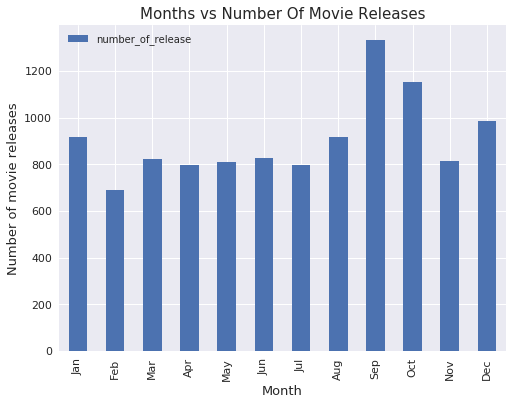

In [62]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)

#### From the plot above, it can be seen that movies are released more in september

### Research Question 2  (What's the top 10 movies with the highest budget?)

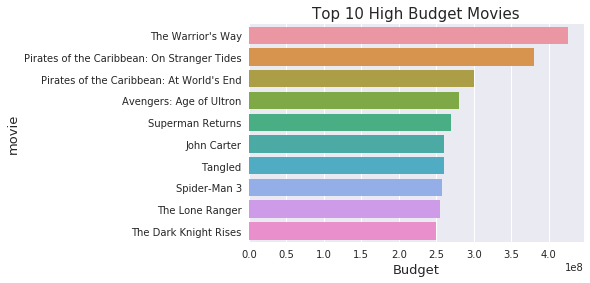

In [63]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
ax.set_ylabel("movie",fontsize = 13)
sns.set_style("darkgrid")


##### The Warior's Way has the highest budget

### Research Question 3  (What's the average runtime of all the movies?)

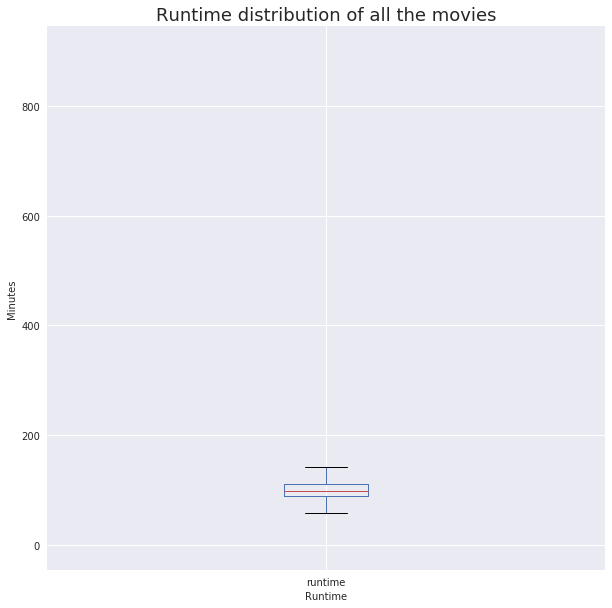

In [64]:
# Box plot for Runtime.

df['runtime'].plot(kind = 'box', figsize = (10,10));
plt.ylabel('Minutes', fontsize=10)
plt.xlabel('Runtime', fontsize=10)
plt.title('Runtime distribution of all the movies', fontsize=18);

#### From the boxplot above, the avarage runtime for all the movies is 115 minutes)

### Research Question 4  (Which genre of movie have the highest return on investment?)

In [65]:
# Split the genre
genres = df
genres = df.assign(genres = df['genres'].str.split("|",expand=True))
genres.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [66]:
# Get budget and revenue of each genre
genres[['genres', 'budget', 'revenue',]].groupby(['genres']).mean()

,budget,revenue
genres,,
Action,2.464650e+07,6.075854e+07
Adventure,4.023351e+07,1.247560e+08
Animation,2.149240e+07,7.145670e+07
Comedy,1.037857e+07,2.930248e+07
Crime,1.338997e+07,3.343632e+07
Documentary,4.308277e+05,1.972712e+06
Drama,1.032756e+07,2.514403e+07
Family,1.835339e+07,6.148926e+07
Fantasy,2.344872e+07,6.729393e+07


In [67]:
# Create our new dataframe to work on RoI
df_roi = genres[['genres', 'budget', 'revenue']].groupby(['genres']).mean()
df_roi.head()

,budget,revenue
genres,,
Action,2.464650e+07,6.075854e+07
Adventure,4.023351e+07,1.247560e+08
Animation,2.149240e+07,7.145670e+07
Comedy,1.037857e+07,2.930248e+07
Crime,1.338997e+07,3.343632e+07


In [68]:
# Add a new attribute with the calculated RoI
df_roi['RoI'] = df_roi['revenue']/df_roi['budget']
df_roi.head()

,budget,revenue,RoI
genres,,,
Action,2.464650e+07,6.075854e+07,2.465199
Adventure,4.023351e+07,1.247560e+08,3.100798
Animation,2.149240e+07,7.145670e+07,3.324743
Comedy,1.037857e+07,2.930248e+07,2.823365
Crime,1.338997e+07,3.343632e+07,2.497116


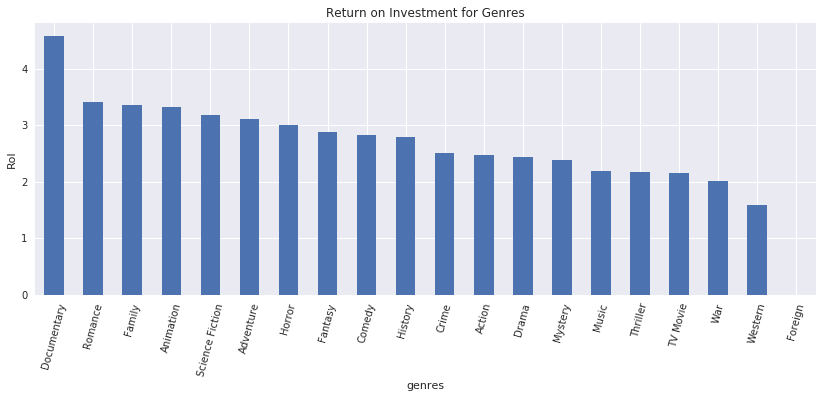

In [69]:
# RoI barplot of each genres' movies

f,ax=plt.subplots(figsize=(14, 5))
df_roi['RoI'] .sort_values(ascending=False).plot(kind="bar",  ax=ax);
plt.xticks(rotation=75,fontsize=10)

ax.set(ylabel = 'RoI', title = 'Return on Investment for Genres')

plt.show()

#### The barplot shows that documentary has the highest return on investment

### Research Question 5  (Which genre has the highest number of released movies over the years?)

In [70]:
#make a function will will split the string and return the count of each genre.
def data(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

In [71]:
total_genre_movies = data('genres')
print(total_genre_movies)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64


Text(0,0.5,'Genres')

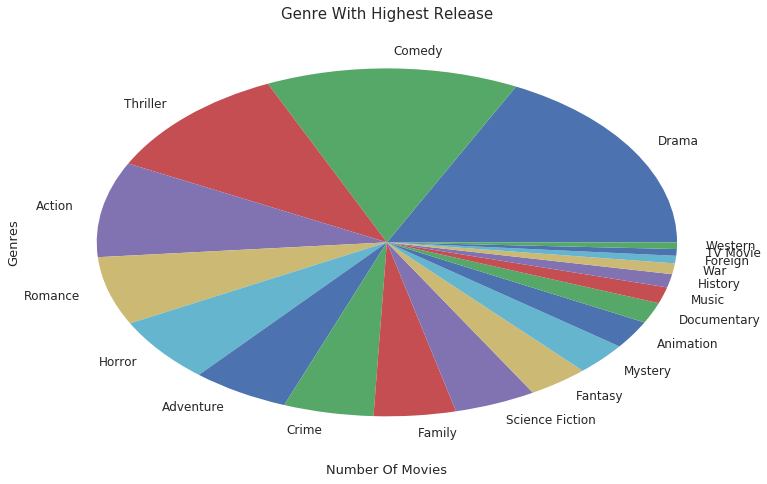

In [72]:
#plot a pie chart using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'pie',figsize = (13,8),fontsize=12)
#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)

#### According to the plot Drama(4761) genre has the highest release of movies followed by Comedy(3793) and Thriller(2908)

### Research Question 6 (Who are the most frequent actors?)

In [73]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenating all the rows of the genres.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
   
    #count each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')

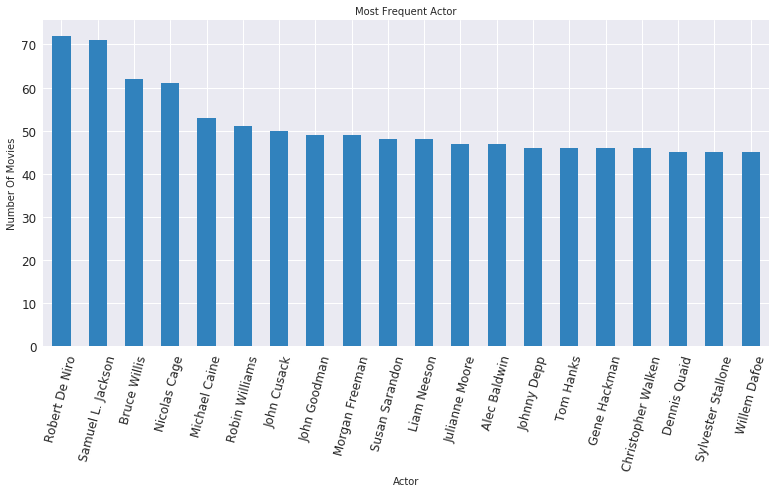

In [74]:
#call the 'count_genre' function. It wiil count number of movies done by each actor.
count_actor_flims = count_genre('cast')

# plot the bar plot.
count_actor_flims.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=10)
plt.xticks(rotation = 75)
plt.xlabel('Actor',fontsize=10)
plt.ylabel("Number Of Movies",fontsize= 10)
sns.set_style("darkgrid")

#### Robert De Niro and Samuel L. Jackson have the highest number of released movies of over 70 movies.

<a id='conclusions'></a>
## Conclusions
The TMDb movie dataset provide many insightful informations on all genre of movies. After Data Wrangling, null values, duplicated values, outliers and 0 values were removed to provide more accurate results. Also, wrong datatypes were corrected.

Bar charts, box plot and pie chart are made to help visualize and answer questions. From the results, it showed the top profits, budgets, genres, etc.

The following deductions can be gotten from the analysis:
* Movies are released more in sepember than any other month
* The movie 'The warriors' Way have the highest budget
* The average runtime for the movies is 115 minutes
* Documentary movies have the highest return on investment
* Drama has the highest number of released movies
* Robert De Niro and Samuel L. Jackson have the highest number of released movies.

### Limitations
Some few limitations can be seen from the dataset which have impact on the analysis of the data.
* When dealing with missing data, about 2000 rows of data were removed, such as rows containing 0 values and null values, vital informations may have been lost.  
* When looking at revenue and budget over the years, we should account for inflation to smooth out the figures, as more recent films will have larger revenunes and budgets due to the impact of inflation.

In [75]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255